# Определение перспективного тарифа для телеком компании

Задача, проанализировать два тарифных плана компании «Мегалайн»: «Смарт» и «Ультра». 

Необходимо дать ответ, какой тариф более прибыльный. 

1. [Изучение общей информации.](#step_1)
2. [Подготовка данных.](#step_2)
    * [Расчет дополнительных занчений для каждого пользователя.](#step_2_1)
3. [Анализ данных.](#step_3)
4. [Проверка гипотез.](#step_4)
5. [Общий вывод.](#step_5)

<a id="step_1"></a>
## 1. Изучение общей информации.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st

Загрузим и изучим все предоставленные файлы, рассмотрим какие в них данные и решим, как с ними дальше работать.

In [19]:
data_calls.info()
data_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [20]:
data_internet.info()
data_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [21]:
data_messages.info()
data_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [22]:
data_tariffs.info()
data_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [23]:
data_users.info()
data_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

### Вывод.

Мы имеем 5 таблиц для анализа данных и ответа на поставленные вопросы. В целом данные предоставленны хорошие, нужно только изменить тип данных в некоторых столбцах и проверить на ошибки.

<a id="step_2"></a>
## 2. Подготовка данных.

Округлим вверх значения минут и мегабайтов, так как это предусмотренно тарифами методом `round`.

In [24]:
data_internet['mb_used'] = data_internet['mb_used'].round()
data_calls['duration'] = data_calls['duration'].round()

Поменяем тип данных на datetime в столбцах с датой.

In [25]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

<a id="step_2_1"></a>
### 2.1. Расчет дополнительных занчений для каждого пользователя.

- Количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
users_calls = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
users_calls.columns = ['calls_count', 'calls_minutes']
users_calls = users_calls.reset_index()
users_calls

,user_id,month,calls_count,calls_minutes
0,1000,5,22,149.0
1,1000,6,43,159.0
2,1000,7,47,319.0
3,1000,8,52,391.0
4,1000,9,58,439.0
...,...,...,...,...
3169,1498,10,41,230.0
3170,1499,9,9,64.0
3171,1499,10,68,429.0
3172,1499,11,74,574.0


- Количество отправленных сообщений по месяцам.

In [27]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
users_messages = data_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
users_messages.columns = ['messages_sum']
users_messages = users_messages.reset_index()
users_messages

,user_id,month,messages_sum
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


- Объем израсходованного интернет-трафика по месяцам.

In [28]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
users_internet = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
users_internet.columns = ['mb_sum']
users_internet = users_internet.reset_index()
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1197.0,2018-06-25,1000,6
3,3,1000_3,550.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,319.0,2018-10-03,1499,10
149392,149392,1499_153,490.0,2018-12-14,1499,12
149393,149393,1499_154,0.0,2018-10-27,1499,10
149394,149394,1499_155,1246.0,2018-11-26,1499,11


- Пмесячная выручка с каждого пользователя.

Сведем 3 таблицы: по интернету, звонкам и сообщения в одну. Методом `merge`, также добавим столбец с названием тарифа и город абонента.

In [29]:
stat_all_users = users_calls.merge(users_messages, on=['user_id', 'month'], how='outer')
stat_all_users = stat_all_users.merge(users_internet, on=['user_id', 'month'], how='outer')
stat_all_users = stat_all_users.merge(data_users[['user_id', 'tariff', 'city']], on='user_id', how='outer')
stat_all_users.sort_values(by=['user_id', 'month'], inplace=True)
stat_all_users.query('month == "nan"') # вероятно в этом месяце пользватели отключили тариф, а в статистику попали 
stat_all_users.drop([3214, 3215], inplace=True) # удалим эти 2 строчки
stat_all_users = stat_all_users.reset_index(drop=True)
stat_all_users

,user_id,month,calls_count,calls_minutes,messages_sum,mb_sum,tariff,city
0,1000,5.0,22.0,149.0,22.0,2253.0,ultra,Краснодар
1,1000,6.0,43.0,159.0,60.0,23232.0,ultra,Краснодар
2,1000,7.0,47.0,319.0,75.0,14004.0,ultra,Краснодар
3,1000,8.0,52.0,391.0,81.0,14054.0,ultra,Краснодар
4,1000,9.0,58.0,439.0,57.0,14569.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10.0,41.0,230.0,42.0,20581.0,smart,Владикавказ
3210,1499,9.0,9.0,64.0,11.0,1846.0,smart,Пермь
3211,1499,10.0,68.0,429.0,48.0,17792.0,smart,Пермь
3212,1499,11.0,74.0,574.0,59.0,17963.0,smart,Пермь


Заменим пропущенные значения на нули, так как они будут отражать, что абонент не ползьвовался данным видом услуги в этом месяце, и чтобы превести цифры к типу `int`.

In [30]:
stat_all_users['calls_count'] = stat_all_users['calls_count'].fillna(0)
stat_all_users['calls_minutes'] = stat_all_users['calls_minutes'].fillna(0)
stat_all_users['messages_sum'] = stat_all_users['messages_sum'].fillna(0)
stat_all_users['mb_sum'] = stat_all_users['mb_sum'].fillna(0)
stat_all_users['month'] = stat_all_users['month'].astype('int')
stat_all_users['calls_count'] = stat_all_users['calls_count'].astype('int')
stat_all_users['calls_minutes'] = stat_all_users['calls_minutes'].astype('int')
stat_all_users['messages_sum'] = stat_all_users['messages_sum'].astype('int')
stat_all_users['mb_sum'] = stat_all_users['mb_sum'].astype('int')
stat_all_users

,user_id,month,calls_count,calls_minutes,messages_sum,mb_sum,tariff,city
0,1000,5,22,149,22,2253,ultra,Краснодар
1,1000,6,43,159,60,23232,ultra,Краснодар
2,1000,7,47,319,75,14004,ultra,Краснодар
3,1000,8,52,391,81,14054,ultra,Краснодар
4,1000,9,58,439,57,14569,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10,41,230,42,20581,smart,Владикавказ
3210,1499,9,9,64,11,1846,smart,Пермь
3211,1499,10,68,429,48,17792,smart,Пермь
3212,1499,11,74,574,59,17963,smart,Пермь


Напишем функцию для подсчета прибыли за каждый месяц.

In [31]:
def rub_per_month(row):
    if row['tariff'] == 'smart':
        profit_for_calls_smart = row['calls_minutes'] - 500
        if profit_for_calls_smart < 0:
            profit_for_calls_smart = 0
        else:
            profit_for_calls_smart = profit_for_calls_smart * 3
        profit_for_messages_smart = row['messages_sum'] - 50
        if profit_for_messages_smart < 0:
            profit_for_messages_smart = 0
        else:
            profit_for_messages_smart = profit_for_messages_smart * 3
        profit_for_internet_smart = row['mb_sum'] - 15360
        if profit_for_internet_smart < 0:
            profit_for_internet_smart = 0
        else:
            if profit_for_internet_smart / 1024 - profit_for_internet_smart // 1024 > 0:
                # проверяем, нужно ли добавить дополнительный гигабайт или нет
                profit_for_internet_smart = (profit_for_internet_smart // 1024 + 1) * 200
            else:
                profit_for_internet_smart = (profit_for_internet_smart // 1024) * 200
        profit_smart = profit_for_calls_smart + profit_for_messages_smart + profit_for_internet_smart + 550
        return profit_smart
    else:
        profit_for_calls = row['calls_minutes'] - 3000
        if profit_for_calls < 0:
            profit_for_calls = 0
        else:
            profit_for_calls = profit_for_calls * 1
        profit_for_messages = row['messages_sum'] - 1000
        if profit_for_messages < 0:
            profit_for_messages = 0
        else:
            profit_for_messages = profit_for_messages * 1
        profit_for_internet = row['mb_sum'] - 30702
        if profit_for_internet < 0:
            profit_for_internet = 0
        else:
            if profit_for_internet / 1024 - profit_for_internet // 1024 > 0:
                profit_for_internet = (profit_for_internet // 1024 + 1) * 150
            else:
                profit_for_internet = (profit_for_internet // 1024) * 150
        profit_ultra = profit_for_calls + profit_for_messages + profit_for_internet + 1950
        return profit_ultra
stat_all_users['profit_per_month'] = stat_all_users.apply(rub_per_month, axis=1)
stat_all_users

,user_id,month,calls_count,calls_minutes,messages_sum,mb_sum,tariff,city,profit_per_month
0,1000,5,22,149,22,2253,ultra,Краснодар,1950
1,1000,6,43,159,60,23232,ultra,Краснодар,1950
2,1000,7,47,319,75,14004,ultra,Краснодар,1950
3,1000,8,52,391,81,14054,ultra,Краснодар,1950
4,1000,9,58,439,57,14569,ultra,Краснодар,1950
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,230,42,20581,smart,Владикавказ,1750
3210,1499,9,9,64,11,1846,smart,Пермь,550
3211,1499,10,68,429,48,17792,smart,Пермь,1150
3212,1499,11,74,574,59,17963,smart,Пермь,1399


### Вывод.

Мы подготовили данные для дальнейшего анализа. Округлили значения минут и мегабайт. Свели таблицы в одну, для удобства дальнейших расчетов и расчетали в ней прибыль.

<a id="step_3"></a>
## 3. Анализ данных.

Сделаем срезы для каждого тарифа.

In [32]:
tariff_smart = stat_all_users.query('tariff == "smart"')
tariff_ultra = stat_all_users.query('tariff == "ultra"')

Начнем с анализа минут, мегабайт и сообщений.

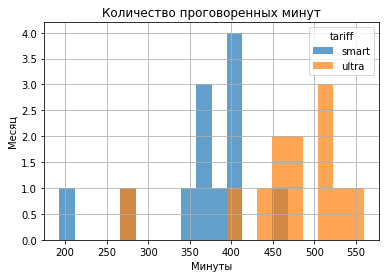

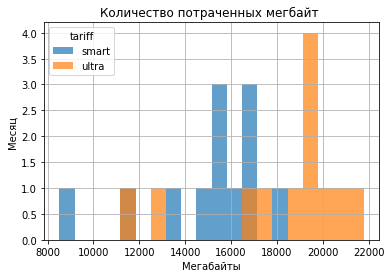

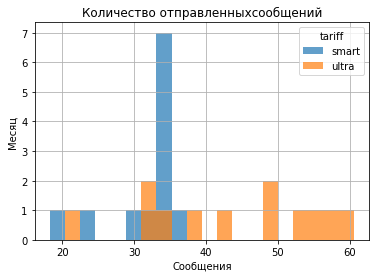

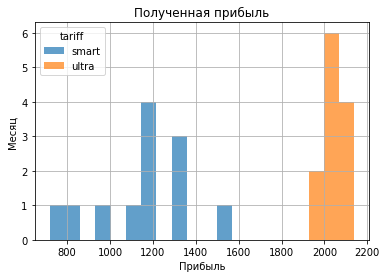

In [104]:
for name, head, x, y in (['calls_minutes', 'Количество проговоренных минут', 'Минуты', 'Месяц'],
          ['mb_sum', 'Количество потраченных мегбайт ', 'Мегабайты', 'Месяц'],
          ['messages_sum', 'Количество отправленныхсообщений', 'Сообщения', 'Месяц'], 
          ['profit_per_month', 'Полученная прибыль', 'Прибыль', 'Месяц']
            ):
    (stat_all_users
     .pivot_table(index='tariff', columns='month', values=name, aggfunc='mean')
     .T
     .plot(kind='hist', alpha=0.7, bins=20, grid=True)
    )
    plt.title(name)
    plt.title(head)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Как видно, кто использует тариф ultra в большнстве случаев больше тратит минут, мегабайт и сообщений, по сравнению с абонентами тарифа smart. Также есть и случаи, где абоненты тарифа smart опережают абонетов ultra. Если "отстающие" из тарифа ultra это одни и те же люди, вероятно им стоит задуматься о смене тарифа.

Рассчетаем дисперсию и стандартное отклонение по тарифам для потраченных минут, сообщений, мегабайт и прибыли.

In [102]:
print('Тариф Ultra')
print('\n')

for i, x in (['calls_minutes', 'Минуты'], 
         ['messages_sum', 'Сообщения'], 
         ['mb_sum', 'Мегабайты'], 
         ['profit_per_month', 'Прибыль']
        ):
    ultra_mean = tariff_ultra[i].mean()
    ultra_var = tariff_ultra[i].var()
    ultra_std = np.std(tariff_ultra[i])
    print(x)
    print('- Среднее значение: {:.3f}'.format(ultra_mean))
    print('- Дисперсия: {:.3f}'.format(ultra_var))
    print('- Стандартное отклонение: {:.3f}'.format(ultra_std))

print('\n')
print('Тариф Smart')
print('\n')

for i, x in (['calls_minutes', 'Минуты'], 
         ['messages_sum', 'Сообщения'], 
         ['mb_sum', 'Мегабайты'], 
         ['profit_per_month', 'Прибыль']
        ):
    smart_mean = tariff_smart[i].mean()
    smart_var = tariff_smart[i].var()
    smart_std = np.std(tariff_smart[i])
    print(x)
    print('- Среднее значение: {:.3f}'.format(smart_mean))
    print('- Дисперсия: {:.3f}'.format(smart_var))
    print('- Стандартное отклонение: {:.3f}'.format(smart_std))

Тариф Ultra


Минуты
- Среднее значение: 496.889
- Дисперсия: 89822.977
- Стандартное отклонение: 299.553
Сообщения
- Среднее значение: 49.363
- Дисперсия: 2285.266
- Стандартное отклонение: 47.780
Мегабайты
- Среднее значение: 19468.824
- Дисперсия: 101751229.245
- Стандартное отклонение: 10082.060
Прибыль
- Среднее значение: 2070.761
- Дисперсия: 142604.603
- Стандартное отклонение: 377.439


Тариф Smart


Минуты
- Среднее значение: 394.269
- Дисперсия: 32361.127
- Стандартное отклонение: 179.852
Сообщения
- Среднее значение: 33.384
- Дисперсия: 796.813
- Стандартное отклонение: 28.222
Мегабайты
- Среднее значение: 16208.425
- Дисперсия: 34462272.780
- Стандартное отклонение: 5869.141
Прибыль
- Среднее значение: 1256.964
- Дисперсия: 641268.073
- Стандартное отклонение: 800.613


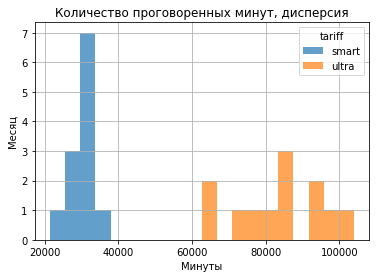

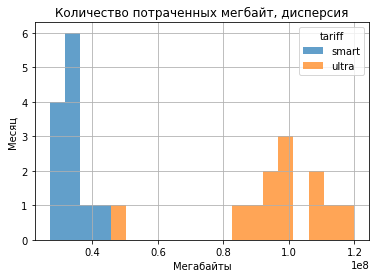

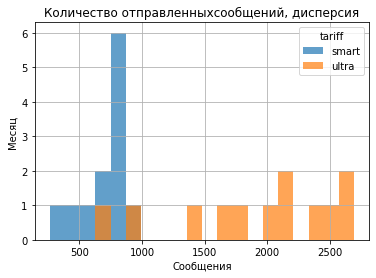

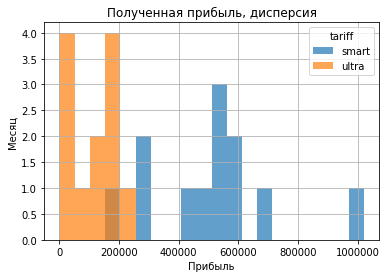

In [110]:
for name, head, x, y in (['calls_minutes', 'Количество проговоренных минут, дисперсия', 'Минуты', 'Месяц'],
          ['mb_sum', 'Количество потраченных мегбайт, дисперсия', 'Мегабайты', 'Месяц'],
          ['messages_sum', 'Количество отправленныхсообщений, дисперсия', 'Сообщения', 'Месяц'], 
          ['profit_per_month', 'Полученная прибыль, дисперсия', 'Прибыль', 'Месяц']
            ):
    (stat_all_users
     .pivot_table(index='tariff', columns='month', values=name, aggfunc='var')
     .T
     .plot(kind='hist', alpha=0.7, bins=20, grid=True)
    )
    plt.title(name)
    plt.title(head)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

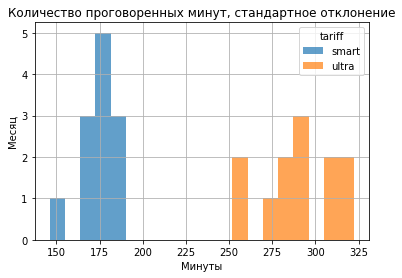

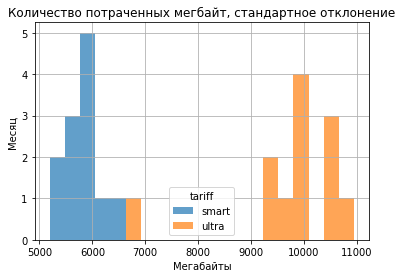

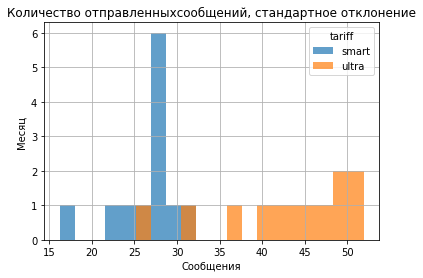

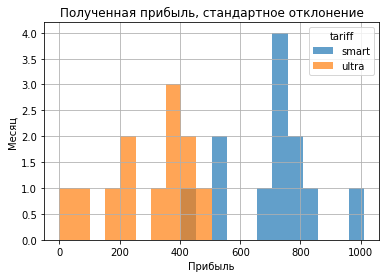

In [109]:
for name, head, x, y in (['calls_minutes', 'Количество проговоренных минут, cтандартное отклонение', 'Минуты', 'Месяц'],
          ['mb_sum', 'Количество потраченных мегбайт, cтандартное отклонение', 'Мегабайты', 'Месяц'],
          ['messages_sum', 'Количество отправленныхсообщений, cтандартное отклонение', 'Сообщения', 'Месяц'], 
          ['profit_per_month', 'Полученная прибыль, cтандартное отклонение', 'Прибыль', 'Месяц']
            ):
    (stat_all_users
     .pivot_table(index='tariff', columns='month', values=name, aggfunc='std')
     .T
     .plot(kind='hist', alpha=0.7, bins=20, grid=True)
    )
    plt.title(name)
    plt.title(head)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### Вывод.

Как видно, средние значения тарифа ultra выше тарифа smart. Значения стандартного отклонения по минутам, мегабайтам и сообщениям в тарифе smart меньше, почти в 2 раза, по сравнению с тарифом ultra. В тарифе ultra, только прибыль имеет меньшее отклонение, следовательно в тарифе ultra прибыль более "кучная". Это следует из того, что в тарифе ultra больший объем предоставляемых услуг, из этого и больше абонентская плата за тариф, поэтому абоненты намного реже прибегают к дополнительным тратам.

<a id="step_4"></a>
## 4. Проверка гипотез.

#### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем нулевую гипотезу (Н0). Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.

Сформулируем альтернативную гипотезу (Н1). Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

С помощью теста Шапиро-Уилка проверим генеральную совокупность на нормальность.

In [196]:
stat, p = st.shapiro(stat_all_users['profit_per_month']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

Statistics=0.893, p-value=0.000
Отклонить гипотезу о нормальности


Тест показал, что нормальность не соблюдается, теперь с помощью теста Левена оценим равенство дисперсий, используя р-значения.

In [194]:
test_leven, p = st.levene(tariff_smart['profit_per_month'], tariff_ultra['profit_per_month'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=559.759, p-value=0.000
Отклонить гипотезу о равенстве дисперсий


Проверим гипотезу с помощью `scipy.stats.ttest_ind`, так как с его помощью можно сравнить средние двух совокупностей.

In [197]:
alpha = .05 # возмем "стандартный" критический уровень занчимости 5%

results = st.ttest_ind(
    tariff_smart['profit_per_month'], 
    tariff_ultra['profit_per_month'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.55826190103029e-274
Отвергаем нулевую гипотезу


Как видим `ttest` показывает, что гипотеза Н0 не подтверждена, следовательно отвергаем нулевую гипотезу.

#### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сначала выделим абонентов из Москвы и из других городов.

In [37]:
profit_moscow = stat_all_users.query('city == "Москва"')
profit_russia = stat_all_users.query('city != "Москва"')

Так как ранее мы уже сделали тест Шапиро-Уилка, и он показал, что нормальность не соблюдается, сразу перейдем к тесту Левена.

In [198]:
test_leven, p = st.levene(profit_russia['profit_per_month'], profit_moscow['profit_per_month'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=4.779, p-value=0.029
Отклонить гипотезу о равенстве дисперсий


Как видно, дисперсии и здесь не равны.

Сформулируем нулевую гипотезу (Н0). Средняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

Сформулируем альтернативную гипотезу (Н1). Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Проверим гипотезу с помощью `scipy.stats.ttest_ind`, так как с его помощью можно сравнить средние двух совокупностей.

In [38]:
alpha= .01  # возьмем уровень критической заничимости 1%, 
            # так как вероятность, что абоненты, в сумме, из других городов принесут большую выручку, больше чем 5%

results = st.ttest_ind(
    profit_russia['profit_per_month'], 
    profit_moscow['profit_per_month'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.45904846628727825
Не получилось отвергнуть нулевую гипотезу


Гипотеза подтвердилась, выручка пользователей из Москвы равна выручки пользователей из других регионов.

### Вывод.

Проведя тест гипотез мы получили.

Что средняя выручка по тарифам не отличается,и выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<a id="step_5"></a>
## 5. Общий вывод.

Проведя анализ компании Мегалайн, в частности двух её тарифов smart и ultra, мы получили следующее.

Пользватели тарифа ultra редко пользуются дополнительными услугами, которые превышают лимит их тарифа. Выручка с этого тарифа более целостна, по сравнению с тарифом smart.

Пользователи тарифа smart чаще преобретают дополнительные пакеты, из-за чего выручка от этого тарифа имеет болшой размах, по сравнению с тарифом ultra.

Хорошим вариантом для телекома будет  сделать промежуточный тариф, направленный на пользователей тарифа smart, который будет включать больший пакет услуг. Данный тариф следует оптимизировать таким образом, чтобы он не дотягивал до ultra, но был больше smart, чтобы пользователи не переходили с более дорого тарифа на "средний", а пользователи smart, которые больше тратят допольнительных услуг, переходили на "средний".

Также был проведен тест гипотез. Одна из которых подтвердилась, а именно, выручка пользователей из Москвы отличается от выручки пользователей из других регионов.